<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import sys
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as stats
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_style('darkgrid')
%matplotlib inline
p = print

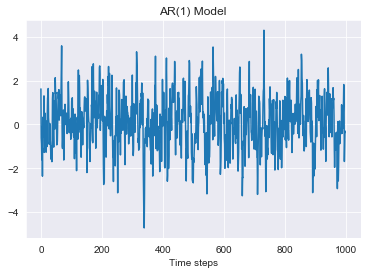

In [2]:
# Autoregressive order 1 model, AR(1)
np.random.seed(1)
mean, std_dev, n_samples = 0.0, 1.0, 1000
x = w = np.random.normal(loc=mean,scale=std_dev,size=n_samples)
a1 = 0.6
for t in range(2,n_samples):
    x[t] = a1*x[t-1] + w[t]
plt.plot(x)
plt.title('AR(1) Model')
plt.xlabel('Time steps')
plt.show()

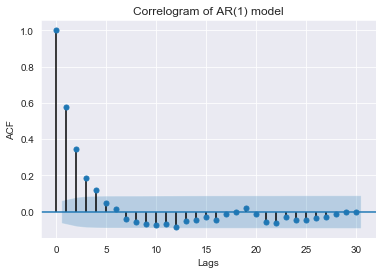

In [3]:
smt.graphics.plot_acf(x,lags=30);
plt.title(f'Correlogram of AR(1) model')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

In [4]:
model = smt.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')
true_order = 1
p(f'\na1 estimate: {round(model.params[0],4)} | best lag order = {est_order}')
p(f'\ntrue a1 = {a1} | true order = {true_order}')


a1 estimate: 0.5819 | best lag order = 1

true a1 = 0.6 | true order = 1


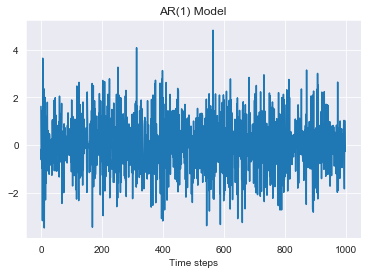

In [5]:
np.random.seed(1)
a1 = -0.6
mean, std_dev, n_samples = 0.0, 1.0, 1000
x = w = np.random.normal(loc=mean,scale=std_dev,size=n_samples)
for t in range(2,n_samples):
    x[t] = a1*x[t-1] + w[t]
plt.plot(x)
plt.title('AR(1) Model')
plt.xlabel('Time steps')
plt.show()

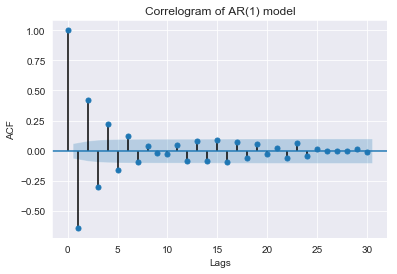

In [6]:
smt.graphics.plot_acf(x,lags=30);
plt.title(f'Correlogram of AR(1) model')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

In [7]:
model = smt.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')
true_order = 1
p(f'\nestimate a1: {round(model.params[0],4)} | best lag order = {est_order}')
p(f'\ntrue a1 = {a1} | true order = {true_order}')


estimate a1: -0.6404 | best lag order = 1

true a1 = -0.6 | true order = 1


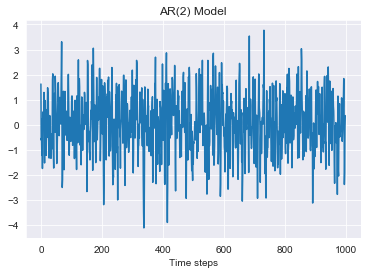

In [8]:
# Autoregressive order 2 model, AR(2)
np.random.seed(1)
a1, a2, n_samples = 0.666, -0.333, 1000
x = w = np.random.normal(0.0, 1.0, n_samples)
for t in range(3,n_samples):
    x[t] = a1*x[t-1] + a2*x[t-2] + w[t]
plt.plot(x)
plt.title('AR(2) Model')
plt.xlabel('Time steps')
plt.show()

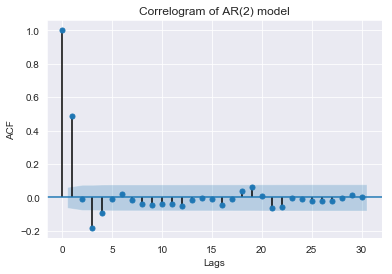

In [9]:
smt.graphics.plot_acf(x,lags=30);
plt.title(f'Correlogram of AR(2) model')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

In [10]:
model = smt.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')
true_order = 2
p(f'\nestimated coefs: {round(model.params[0],4)}, {round(model.params[1],4)} | best lag order = {est_order}')
p(f'\ntrue coefs = {a1}, {a2} | true order = {true_order}')


estimated coefs: 0.6453, -0.323 | best lag order = 2

true coefs = 0.666, -0.333 | true order = 2


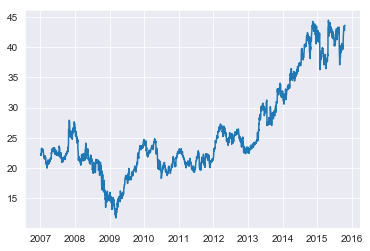

In [11]:
df = web.DataReader('MSFT','yahoo','01/01/2007','10/18/2015')
df.head()
plt.plot(df['Adj Close'])
plt.show()

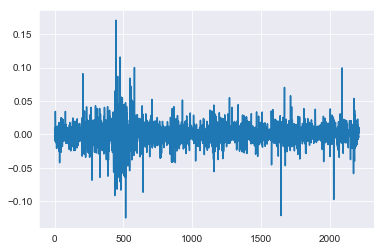

In [12]:
log_rets = np.diff(np.log(df['Adj Close']))
plt.plot(log_rets);

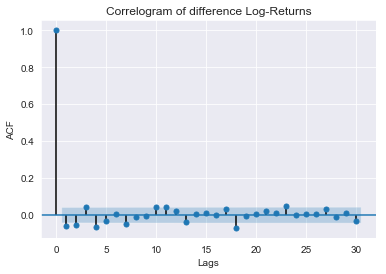

In [13]:
smt.graphics.plot_acf(log_rets,lags=30);
plt.title(f'Correlogram of difference Log-Returns')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

In [14]:
# model = smt.AR(log_rets).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(log_rets).select_order(maxlag=30, ic='aic', trend='nc')
p(f'best lag order = {est_order}')

best lag order = 23


We have our two estimated coefficients, but a best lag order of 27. Given that we have more lags than expeted, a different model may be a better fit for our time-series.

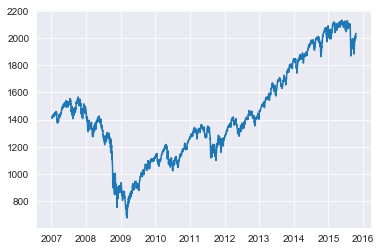

In [15]:
df = web.DataReader('^GSPC','yahoo','01/01/2007','10/18/2015')
df.head()
plt.plot(df['Adj Close'])
plt.show()

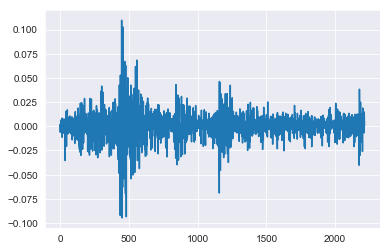

In [16]:
log_rets = np.diff(np.log(df['Adj Close']))
plt.plot(log_rets);

In [17]:
# model = smt.AR(log_rets).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(log_rets).select_order(maxlag=30, ic='aic', trend='nc')
p(f'best lag order = {est_order}')

best lag order = 22
